Tancredi Bosi, 0001121897, tancredi.bosi@studio.unibo.it <br>

Francesco Farneti, 0001145280, francesco.farneti7@studio.unibo.it<br>

Luca Mercuriali, 0001139257, luca.mercuriali2@studio.unibo.it <br>

# Assignment Module 2: Product Classification

The goal of this assignment is to implement a neural network that classifies smartphone pictures of products found in grocery stores. The assignment will be divided into two parts: first, you will be asked to implement from scratch your own neural network for image classification; then, you will fine-tune a pretrained network provided by PyTorch.


## Preliminaries: the dataset

The dataset you will be using contains natural images of products taken with a smartphone camera in different grocery stores:

<p align="center">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Granny-Smith.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Pink-Lady.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Lemon.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Banana.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Vine-Tomato.jpg" width="150">
</p>
<p align="center">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Yellow-Onion.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Green-Bell-Pepper.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Arla-Standard-Milk.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Oatly-Natural-Oatghurt.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Alpro-Fresh-Soy-Milk.jpg" width="150">
</p>

The products belong to the following 43 classes:
```
0.  Apple
1.  Avocado
2.  Banana
3.  Kiwi
4.  Lemon
5.  Lime
6.  Mango
7.  Melon
8.  Nectarine
9.  Orange
10. Papaya
11. Passion-Fruit
12. Peach
13. Pear
14. Pineapple
15. Plum
16. Pomegranate
17. Red-Grapefruit
18. Satsumas
19. Juice
20. Milk
21. Oatghurt
22. Oat-Milk
23. Sour-Cream
24. Sour-Milk
25. Soyghurt
26. Soy-Milk
27. Yoghurt
28. Asparagus
29. Aubergine
30. Cabbage
31. Carrots
32. Cucumber
33. Garlic
34. Ginger
35. Leek
36. Mushroom
37. Onion
38. Pepper
39. Potato
40. Red-Beet
41. Tomato
42. Zucchini
```

The dataset is split into training (`train`), validation (`val`), and test (`test`) set.

The following code cells download the dataset and define a `torch.utils.data.Dataset` class to access it. This `Dataset` class will be the starting point of your assignment: use it in your own code and build everything else around it.

In [ ]:
!git clone https://github.com/marcusklasson/GroceryStoreDataset.git

Cloning into 'GroceryStoreDataset'...
remote: Enumerating objects: 6559, done.
remote: Counting objects: 100% (266/266), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 6559 (delta 45), reused 35 (delta 35), pack-reused 6293 (from 1)
Receiving objects: 100% (6559/6559), 116.26 MiB | 15.17 MiB/s, done.
Resolving deltas: 100% (275/275), done.
Updating files: 100% (5717/5717), done.


In [ ]:
from pathlib import Path
from PIL import Image
from torch import Tensor
from torch.utils.data import Dataset
from typing import List, Tuple

In [ ]:
class GroceryStoreDataset(Dataset):

    def __init__(self, split: str, transform=None) -> None:
        super().__init__()
        self.root = Path("GroceryStoreDataset/dataset")
        self.split = split
        self.paths, self.labels = self.read_file()
        self.transform = transform

    def __len__(self) -> int:
        return len(self.labels)

    def __getitem__(self, idx) -> Tuple[Tensor, int]:
        img = Image.open(self.root / self.paths[idx])
        label = self.labels[idx]

        if self.transform:
            img = self.transform(img)

        return img, label

    def read_file(self) -> Tuple[List[str], List[int]]:
        paths = []
        labels = []

        with open(self.root / f"{self.split}.txt") as f:
            for line in f:
                # path, fine-grained class, coarse-grained class
                path, _, label = line.replace("\n", "").split(", ")
                paths.append(path), labels.append(int(label))

        return paths, labels

    def get_num_classes(self) -> int:
        return max(self.labels) + 1

## Part 1: design your own network



Your goal is to implement a convolutional neural network for image classification and train it on `GroceryStoreDataset`. You should consider yourselves satisfied once you obtain a classification accuracy on the **validation** split of **around 60%**. You are free to achieve that however you want, except for a few rules you must follow:



- You **cannot** simply instantiate an off-the-self PyTorch network. Instead, you must construct your network as a composition of existing PyTorch layers. In more concrete terms, you can use e.g. `torch.nn.Linear`, but you **cannot** use e.g. `torchvision.models.alexnet`.



- Justify every *design choice* you make. Design choices include network architecture, training hyperparameters, and, possibly, dataset preprocessing steps. You can either (i) start from the simplest convolutional network you can think of and add complexity one step at a time, while showing how each step gets you closer to the target ~60%, or (ii) start from a model that is already able to achieve the desired accuracy and show how, by removing some of its components, its performance drops (i.e. an *ablation study*). You can *show* your results/improvements however you want: training plots, console-printed values or tables, or whatever else your heart desires: the clearer, the better.



Don't be too concerned with your network performance: the ~60% is just to give you an idea of when to stop. Keep in mind that a thoroughly justified model with lower accuracy will be rewarded **more** points than a poorly experimentally validated model with higher accuracy.

In [ ]:
pip install torchsummary

### Import useful libraries

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchsummary import summary
from torch.utils.data import default_collate
from torchvision.transforms import v2
import numpy as np
import random

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)

### Set the hyperparameters for the first part

In [ ]:
# HYPERPARAMETERS
image_size = (256, 256)
batch_size = 32
num_aug_copies = 4
lr = 1e-3
num_epochs = 50
es_patience = 8
scheduler_patience = 4

### Load the dataset and Data Augmentation

The data is loaded with *image_size* and normalized. After that, we create the dataset augmenting it *num_aug_copies* times. <br>
The transformations in the augmented copies are listed in the composition *augmentation_transform*.<br>
Finally, we add also CutMix and MixUp. All this Data Augmentation helped us a lot to reduce overfitting in the training phase.




In [ ]:
class AugmentedDataset(Dataset):

    def __init__(self, original_dataset, num_augmented_copies=1, augment_transform=None):
        self.original_dataset = original_dataset
        self.num_augmented_copies = num_augmented_copies
        self.augment_transform = augment_transform

        # Combine the original samples and the augmented samples
        self.total_samples = len(self.original_dataset) * (1 + self.num_augmented_copies)

    def __len__(self):
        return self.total_samples

    def __getitem__(self, idx):
        original_length = len(self.original_dataset)

        if idx < original_length:
            return self.original_dataset[idx]
        else:
            # Create augmented sample
            original_idx = idx % original_length
            img, label = self.original_dataset[original_idx]

            if self.augment_transform and isinstance(img, Image.Image):
                img = self.augment_transform(img)

            return img, label

def collate_fn(batch):
  return cutmix_or_mixup(*default_collate(batch))

# Define the transformations for the training and validation sets
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define the transformations for augmented samples
augmentation_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(size=image_size, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


original_dataset = GroceryStoreDataset(split='train', transform=transform)
val_dataset = GroceryStoreDataset(split='val', transform=transform)

augmented_dataset = AugmentedDataset(original_dataset, num_augmented_copies=num_aug_copies, augment_transform=augmentation_transform)
print('Dimension of the augmented dataset:', augmented_dataset.__len__())

cutmix = v2.CutMix(num_classes = 43, alpha=0.5)
mixup = v2.MixUp(num_classes = 43, alpha=0.5)
cutmix_or_mixup = v2.RandomChoice([cutmix, mixup])

train_loader_augmented = DataLoader(augmented_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

Dimension of the augmented dataset: 13200


### Define the network structure

In [ ]:
class CustomCNN(nn.Module):
    def __init__(self, num_classes: int=43) -> None:
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1, bias=False)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.activation = nn.ReLU()
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        # 3 fully connected layers
        self.fc1 = nn.Linear(128, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)

        self.dropout = nn.Dropout(p=0.5)

        # Weight initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode="fan_out", nonlinearity="relu")
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x1 = self.activation(self.conv1(x))
        x1 = self.activation(self.bn1(self.conv2(x1)))
        x1 = self.pool(x1)
        x2 = self.activation(self.bn2(self.conv3(x1)))
        x2 = self.pool(x2)
        x2 = self.activation(self.bn3(self.conv4(x2)))
        x2 = self.pool(x2)
        x2 = self.avgpool(x2)
        x2 = torch.flatten(x2, 1)

        x2 = self.activation(self.dropout(self.fc1(x2)))
        x2 = self.activation(self.dropout(self.fc2(x2)))
        x2 = self.fc3(x2)

        return x2.float()

### Define EarlyStopping and the training function

In [ ]:
class EarlyStopping:
    def __init__(self, patience=3, delta=0):
        self.patience = patience
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = torch.inf
        self.delta = delta
        self.best_model_state_dict = None

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        # Saves model when validation loss decrease.
        if self.val_loss_min is None or val_loss < self.val_loss_min:
            self.val_loss_min = val_loss
            torch.save(model.state_dict(), 'checkpoint.pt')

    def restore_best_weights(self, model):
      model.load_state_dict(torch.load('checkpoint.pt'))

# Training loop
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20, patience=3):
    early_stopping = EarlyStopping(patience=patience)

    train_acc_history = []
    val_acc_history = []
    train_loss_history = []
    val_loss_history = []
    es_epoch = None

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to('cuda'), labels.to('cuda') if torch.cuda.is_available() else (images, labels)
            model.to('cuda') if torch.cuda.is_available() else model

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            if labels.dim() > 1:
                labels = torch.argmax(labels, 1)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        train_acc_history.append(train_accuracy)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%')
        train_loss_history.append(running_loss / len(train_loader))

        val_loss, val_accuracy = validate_model(model, val_loader, criterion)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_accuracy)
        scheduler.step(val_loss)

        # Early Stopping check
        early_stopping(val_loss, model)
        if early_stopping.early_stop:
          es_epoch = epoch + 1 - patience
          print("Early stopping at epoch", epoch + 1)
          break

    early_stopping.restore_best_weights(model)  # Restore best model weights

    # Plot accuracy history
    plot_history(train_acc_history, val_acc_history, train_loss_history, val_loss_history, es_epoch)

# Validation loop
def validate_model(model, val_loader, criterion):
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to('cuda'), labels.to('cuda') if torch.cuda.is_available() else (images, labels)
            model.to('cuda') if torch.cuda.is_available() else model

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f'Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%')
    return val_loss / len(val_loader), val_accuracy

def plot_history(train_acc_history, val_acc_history, train_loss_history, val_loss_history, es_epoch=False):
    epochs = range(1, len(train_acc_history) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc_history, 'bo--', label='Training Accuracy')
    plt.plot(epochs, val_acc_history, 'go--', label='Validation Accuracy')
    if es_epoch is not None:
      plt.axvline(x=es_epoch, color='red', linestyle='--', label=f'Early Stopping at Epoch {es_epoch}')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss_history, 'bo--', label='Training Loss')
    plt.plot(epochs, val_loss_history, 'go--', label='Validation Loss')
    if es_epoch is not None:
      plt.axvline(x=es_epoch, color='red', linestyle='--', label=f'Early Stopping at Epoch {es_epoch}')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

def print_accuracy(model, test_loader, criterion, data):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to('cuda'), labels.to('cuda') if torch.cuda.is_available() else (images, labels)
            model.to('cuda') if torch.cuda.is_available() else model
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'{data} Accuracy: {accuracy:.2f}%')

### Create the model and visualize the structure

In [ ]:
num_classes = original_dataset.get_num_classes()
model_taskA = CustomCNN(num_classes=num_classes)
model_taskA.to('cuda') if torch.cuda.is_available() else model_taskA
summary(model_taskA, input_size=(3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 128, 128]             432
              ReLU-2         [-1, 16, 128, 128]               0
            Conv2d-3         [-1, 32, 128, 128]           4,608
       BatchNorm2d-4         [-1, 32, 128, 128]              64
              ReLU-5         [-1, 32, 128, 128]               0
         MaxPool2d-6           [-1, 32, 63, 63]               0
            Conv2d-7           [-1, 64, 63, 63]          18,432
       BatchNorm2d-8           [-1, 64, 63, 63]             128
              ReLU-9           [-1, 64, 63, 63]               0
        MaxPool2d-10           [-1, 64, 31, 31]               0
           Conv2d-11          [-1, 128, 31, 31]          73,728
      BatchNorm2d-12          [-1, 128, 31, 31]             256
             ReLU-13          [-1, 128, 31, 31]               0
        MaxPool2d-14          [-1, 128,

### Train the model


Epoch [1/50], Loss: 2.9003, Accuracy: 24.27%
Validation Loss: 2.3271, Validation Accuracy: 32.77%
Epoch [2/50], Loss: 2.4385, Accuracy: 37.53%
Validation Loss: 1.9744, Validation Accuracy: 39.19%
Epoch [3/50], Loss: 2.3336, Accuracy: 43.02%
Validation Loss: 1.6636, Validation Accuracy: 50.68%
Epoch [4/50], Loss: 2.1488, Accuracy: 49.27%
Validation Loss: 1.7894, Validation Accuracy: 42.57%
EarlyStopping counter: 1 out of 8
Epoch [5/50], Loss: 2.0898, Accuracy: 52.80%
Validation Loss: 1.4618, Validation Accuracy: 51.69%
Epoch [6/50], Loss: 2.0084, Accuracy: 55.16%
Validation Loss: 1.6712, Validation Accuracy: 48.65%
EarlyStopping counter: 1 out of 8
Epoch [7/50], Loss: 1.9111, Accuracy: 59.04%
Validation Loss: 1.3564, Validation Accuracy: 56.76%
Epoch [8/50], Loss: 1.8686, Accuracy: 61.68%
Validation Loss: 1.3397, Validation Accuracy: 55.07%
Epoch [9/50], Loss: 1.8649, Accuracy: 62.63%
Validation Loss: 1.4179, Validation Accuracy: 52.03%
EarlyStopping counter: 1 out of 8
Epoch [10/50], L

<ipython-input-9-44ad95387356>:67: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('checkpoint.pt'))


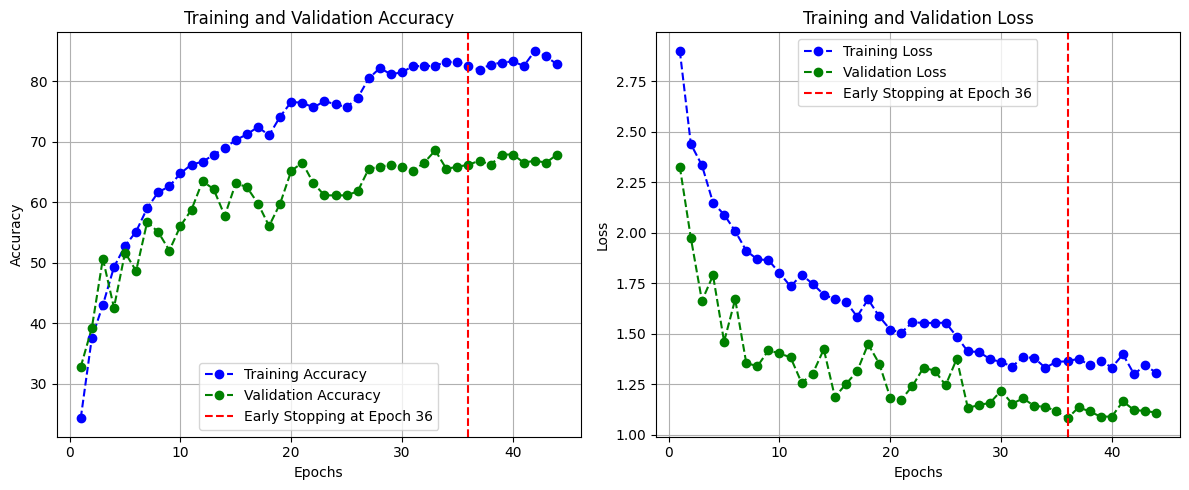

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model_taskA.parameters(), lr=lr)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, mode='min', factor=0.3, patience=scheduler_patience)
train_model(model_taskA, train_loader_augmented, val_loader, criterion, optimizer, scheduler, num_epochs=num_epochs, patience=es_patience)

### Print Results

In [ ]:
print_accuracy(model_taskA, val_loader, criterion, 'Validation')

Validation Accuracy: 66.22%


### Discussion over the network

#### Network Architecture

The aim of our project was to build a network with a small number of parameters to achieve good performances on the dataset. We achived that through the use of techniques learned in the course that helped us to have better results implementing a network that has a low number of parameters.<br>

We decided to avoid the use of stem layer, so our network starts with a 3x3 stride-2 convolution that halves the image input size and brings the number of channels to 16. <br>

After that, we chose to follow the idea of the VGG network, so we designed the network as a repetition of stages, but we decided to keep them simpler. We implemented 3 stages, in particular each of them includes a 3x3 stride-1 convolution that doubles the number of channels, a batch-normalization layer and a max-pool layer that halves the image size. Though the stages have only one convolution, we achieved a good result in the training process, so we kept them that way to preserve simplicity.<br>

After that, we used an adaptive global average pooling layer that reduces the activation size to 128 (number of channels achieved with the stages).<br>

Finally, we added 3 fully-connected layers that process the data and output the prediction class. Initially we implemented only one fully-connected layer, but we achieved way better results using 3 at the cost of having about 60.000 additional parameters. This choice helped us a lot also to reduce overfitting, because we added dropout to the first 2 fully-connected layers.<br>

The network has **169,115** parameters, so it is small. We decided to initialize the parameters using Kaiming normal distribution because it helps the training to converge using ReLu as activation function [*K. He, X. Zhang, S. Ren and J. Sun, "Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification," 2015 IEEE International Conference on Computer Vision (ICCV), Santiago, Chile, 2015, pp. 1026-1034, doi: 10.1109/ICCV.2015.123*].

<br><br>





#### Training process

We first trained the network using only AdamW resulting in a strong case of overfitting. Then, we added the Data Augmentation class, MixUp and CutOut achieving way better results. After that we improved the training process using the LRReduceOnPlateau scheduler and adding Early Stopping; the second one reduced again overfitting restoring the best weights of the model.<br>

We decided also to work with normalized and resized images to lower the time of the training phase.<br>

With these design choices we are able to achive a validation accuracy of 66% without overfitting too much (training accuracy of 82%).

### Ablation Study

To motivate the choices made we performed an ablation study comparing the training and validation accuracies with a given component and without it. The blue lines refer to our choice, the green lines refer to the non-adopted choice.<br>

We performed the ablation study on kaggle to fasten the process (better GPU) and mantain the compactness of the notebook.


#### Global Average Pooling

Because we decided to have 3 fully-connected layers the global average pooling helped us a lot in reducing the number of parameters: 7,509,147 parameters without global average pooling and 169,115 using it.<br>

Global average pooling reduces also overfitting a lot, making the network train better and achieving higher accuracy.

![Average Pooling](https://raw.githubusercontent.com/tancredibosi/IPCV_images_assignment2/main/res-as-avg-pooling-task1.png)

<br>

#### Data Augmentation

Data Augmentation helped the training reducing overfitting and thus achiving better accuracy results. This was important because the given training set has a small size.

![data](https://raw.githubusercontent.com/tancredibosi/IPCV_images_assignment2/main/res-as-data-augmentation-task1.png)

<br>

#### Dropout

As discussed before, the two dropout layers reduced overfitting and allowed us to implement more fully connected layers in order to achieve better accuracy.

![Dropout](https://raw.githubusercontent.com/tancredibosi/IPCV_images_assignment2/main/res-as-dropout-task1.png)

## Part 2: fine-tune an existing network



Your goal is to fine-tune a pretrained **ResNet-18** model on `GroceryStoreDataset`. Use the implementation provided by PyTorch, do not implement it yourselves! (i.e. exactly what you **could not** do in the first part of the assignment). Specifically, you must use the PyTorch ResNet-18 model pretrained on ImageNet-1K (V1). Divide your fine-tuning into two parts:



1. First, fine-tune the Resnet-18 with the same training hyperparameters you used for your best model in the first part of the assignment.

1. Then, tweak the training hyperparameters in order to increase the accuracy on the validation split of `GroceryStoreDataset`. Justify your choices by analyzing the training plots and/or citing sources that guided you in your decisions (papers, blog posts, YouTube videos, or whatever else you find enlightening). You should consider yourselves satisfied once you obtain a classification accuracy on the **validation** split **between 80 and 90%**.

### Define the ResNet class

## Task 2 - Part 1

In [ ]:
from torchvision.models import resnet18, ResNet18_Weights

class ResNet(nn.Module):
    def __init__(self, num_classes: int=43) -> None:
        super(ResNet, self).__init__()
        weights = ResNet18_Weights.IMAGENET1K_V1
        self.resnet = resnet18(weights=weights, progress=True)

        num_ftrs = self.resnet.fc.in_features

        # Add to the end of the ResNet the fully-connected classification block of our previous network
        self.resnet.fc = nn.Sequential(
            nn.Linear(num_ftrs, 256),
            nn.Dropout(p=0.5),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.Dropout(p=0.5),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

        # Initialize the weights of the new layers
        nn.init.xavier_uniform_(self.resnet.fc[0].weight)
        nn.init.xavier_uniform_(self.resnet.fc[3].weight)
        nn.init.xavier_uniform_(self.resnet.fc[6].weight)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.resnet(x)

### Traing the ResNet with the previous hyperparameters

In [ ]:
num_classes = original_dataset.get_num_classes()
model_taskB = ResNet(num_classes)
model_taskB.to('cuda') if torch.cuda.is_available() else model_taskB
summary(model_taskB, input_size=(3, 256, 256))

optimizer = optim.AdamW(model_taskB.parameters(), lr=lr)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 204MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           9,408
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
         MaxPool2d-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
              ReLU-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
             ReLU-10           [-1, 64, 64, 64]               0
       BasicBlock-11           [-1, 64, 64, 64]               0
           Conv2d-12           [-1, 64, 64, 64]          36,864
      BatchNorm2d-13           [-1, 64, 64, 64]             128
             ReLU-14           [-1, 64,

Epoch [1/50], Loss: 2.9035, Accuracy: 34.11%
Validation Loss: 2.2816, Validation Accuracy: 42.91%
Epoch [2/50], Loss: 2.4451, Accuracy: 48.57%
Validation Loss: 2.0407, Validation Accuracy: 51.69%
Epoch [3/50], Loss: 2.1479, Accuracy: 58.13%
Validation Loss: 1.7585, Validation Accuracy: 60.14%
Epoch [4/50], Loss: 1.9263, Accuracy: 64.77%
Validation Loss: 1.4540, Validation Accuracy: 61.82%
Epoch [5/50], Loss: 1.7888, Accuracy: 69.01%
Validation Loss: 1.4710, Validation Accuracy: 63.85%
EarlyStopping counter: 1 out of 8
Epoch [6/50], Loss: 1.7262, Accuracy: 72.61%
Validation Loss: 1.3930, Validation Accuracy: 64.53%
Epoch [7/50], Loss: 1.6529, Accuracy: 75.78%
Validation Loss: 1.2780, Validation Accuracy: 71.28%
Epoch [8/50], Loss: 1.5556, Accuracy: 79.34%
Validation Loss: 1.2786, Validation Accuracy: 69.26%
EarlyStopping counter: 1 out of 8
Epoch [9/50], Loss: 1.4910, Accuracy: 82.27%
Validation Loss: 1.3198, Validation Accuracy: 67.57%
EarlyStopping counter: 2 out of 8
Epoch [10/50], L

/tmp/ipykernel_23/3685422308.py:67: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('checkpoint.pt'))


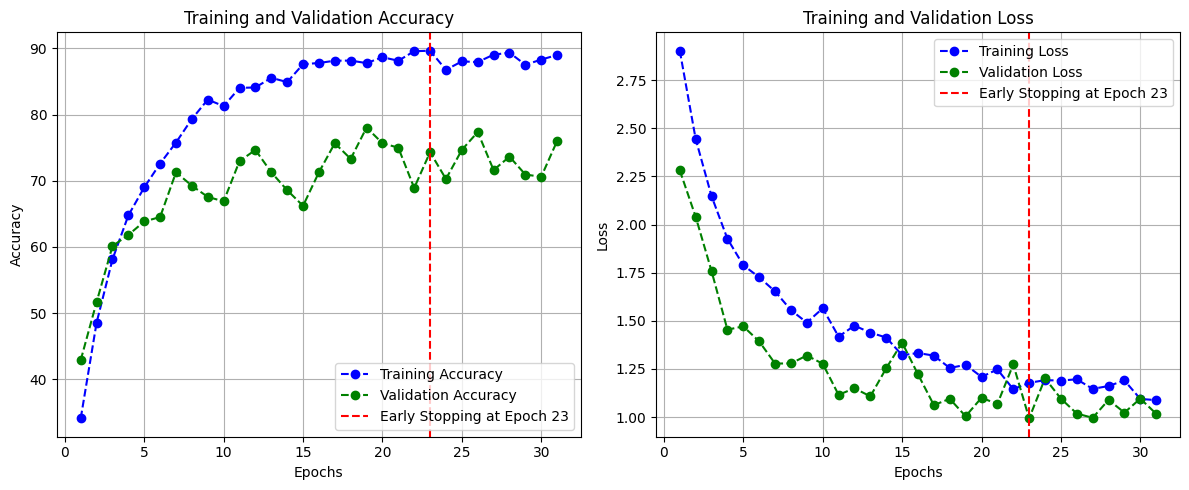

In [ ]:
train_model(model_taskB, train_loader_augmented, val_loader, criterion, optimizer, scheduler, num_epochs=num_epochs, patience=es_patience)

### Print Results

In [ ]:
print_accuracy(model_taskB, val_loader, criterion, 'Validation')

Validation Accuracy: 74.32%


## Task 2 - Part 2

### Define the new hyperparameters

In [ ]:
# HYPERPARAMETERS
image_size = (320, 320)
batch_size = 128
num_aug_copies = 5
lr_pretrained = 7e-6
lr_fc = 7e-5
num_epochs = 50
es_patience = 8
scheduler_patience = 4

### Reload the dataset with the new settings

In [ ]:
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

augmentation_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(size=image_size, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

original_dataset = GroceryStoreDataset(split='train', transform=transform)
val_dataset = GroceryStoreDataset(split='val', transform=transform)

augmented_dataset = AugmentedDataset(original_dataset, num_augmented_copies=num_aug_copies, augment_transform=augmentation_transform)
print('Dimension of the augmented dataset:', augmented_dataset.__len__())

cutmix = v2.CutMix(num_classes = 43, alpha=0.5)
mixup = v2.MixUp(num_classes = 43, alpha=0.5)
cutmix_or_mixup = v2.RandomChoice([cutmix, mixup])

train_loader_augmented = DataLoader(augmented_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

Dimension of the augmented dataset: 15840


### Create the model

In [ ]:
num_classes = original_dataset.get_num_classes()
model_taskB = ResNet(num_classes)
model_taskB.to('cuda') if torch.cuda.is_available() else model_taskB
summary(model_taskB, input_size=(3, 320, 320))

criterion = nn.CrossEntropyLoss()

# Optimizer with different learning rates
optimizer = optim.AdamW([
    {'params': model_taskB.resnet.fc.parameters(), 'lr': lr_fc},
    {'params': list(model_taskB.resnet.parameters())[:-7], 'lr': lr_pretrained}
])

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, mode='min', factor=0.3, patience=scheduler_patience)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           9,408
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

### Train the model

Epoch [1/50], Loss: 3.7982, Accuracy: 9.44%
Validation Loss: 3.1661, Validation Accuracy: 28.72%
Epoch [2/50], Loss: 3.1547, Accuracy: 23.65%
Validation Loss: 2.6079, Validation Accuracy: 37.16%
Epoch [3/50], Loss: 2.7238, Accuracy: 36.16%
Validation Loss: 2.1373, Validation Accuracy: 48.31%
Epoch [4/50], Loss: 2.5256, Accuracy: 43.77%
Validation Loss: 1.9220, Validation Accuracy: 53.04%
Epoch [5/50], Loss: 2.3189, Accuracy: 50.01%
Validation Loss: 1.7163, Validation Accuracy: 57.09%
Epoch [6/50], Loss: 2.2245, Accuracy: 54.31%
Validation Loss: 1.6295, Validation Accuracy: 60.47%
Epoch [7/50], Loss: 2.1685, Accuracy: 57.22%
Validation Loss: 1.5514, Validation Accuracy: 61.82%
Epoch [8/50], Loss: 1.8610, Accuracy: 65.29%
Validation Loss: 1.3395, Validation Accuracy: 66.22%
Epoch [9/50], Loss: 1.8995, Accuracy: 65.61%
Validation Loss: 1.2348, Validation Accuracy: 71.62%
Epoch [10/50], Loss: 1.6912, Accuracy: 71.37%
Validation Loss: 1.1357, Validation Accuracy: 72.64%
Epoch [11/50], Loss:

/tmp/ipykernel_23/3685422308.py:67: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('checkpoint.pt'))


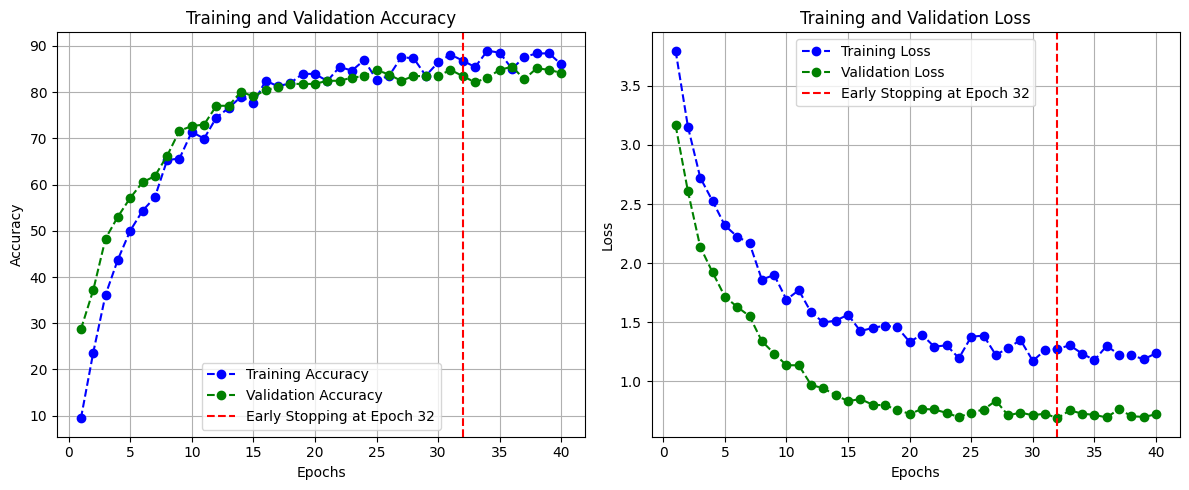

In [ ]:
train_model(model_taskB, train_loader_augmented, val_loader, criterion, optimizer, scheduler, num_epochs=num_epochs, patience=es_patience)

### Print the results

In [ ]:
print_accuracy(model_taskB, val_loader, criterion, 'Validation')

Validation Accuracy: 83.45%


### Discussion over the Fine-Tuning

We imported the ResNet18 as requested, replacing the final fully connected layer with the same fully connected block presented in the first network implemented by us: 2 fc layers (256 -> 128) with dropout of 0.5 and then a classification layer that brings the output to *num_classes*. These design choices allowed us to achive better results without overfitting, as we further analize in the ablation studies.<br>

In the first part of this task we used exactly the same functions and hyperparameters used for the train of the first model, reaching however decent results (about 74% accuracy on the validation set). So, in the second part we decided to improve further the network performances, changing some hyperparameters as requested.<br>

In particular, the training differences are:

- **Image size**: since ResNet goes deeper than our network, we decided to increase the dimensions of the input images from 256x256 to **320x320**.

- **Batch size**: because ResNet has a lot of parameters (11,346,283), we decided to increase the batch_size from 32 to **128** in order to speed-up the training process.

- **Learning rate**: we divided the network into two blocks with different learning rates. The first block consists of all the pre-trained ResNet layers, which are trained with a learning rate of 7e-6 to minimally alter the pre-existing weights. The second block, containing the two fully-connected layers, is trained with a higher learning rate of 7e-5 to enable it to learn optimal parameters. This approach balances preserving the pre-trained features while fine-tuning the final layers for our specific task.

<br>



With these modifications, we were able to achieve notable improvements over the first part, not only attaining higher validation accuracy (**83.45%**) but also substantially reducing overfitting. This allowed the model to generalize better to unseen data, demonstrating more stable performance and addressing the issues of overfitting that were prevalent in the first part.


### Ablation Study

#### Larger Image Size

We initially investigated the impact of increasing the image size on model performance. While the training process itself did not change significantly, increasing the input image size to 320x320 resulted in nearly a 2% improvement in validation accuracy. This improvement is likely due to the network's ability to capture more detailed features from the larger input, providing it with richer and more informative content to learn from.



![Larger Image Size](https://raw.githubusercontent.com/tancredibosi/IPCV_images_assignment2/main/as_image_size_task2.png)



<br>



#### Different Learning Rates

Here we study the difference of using two learning rates on the two ResNet blocks. We can see that this choice allow us to achieve 1.50% more validation accuracy.



![Different Learning Rate](https://raw.githubusercontent.com/tancredibosi/IPCV_images_assignment2/main/res-as-different-learning-rate-task2.png)



<br>



#### Dropout

Lastly, we examined the impact of dropout layers within the fully-connected block. The results show a clear advantage when using dropout: without it, the network tends to overfit significantly, resulting in lower validation accuracy.<br>
This underlines also the effectivness of using some fully-connected layers at the end because, with dropout, they helped a lot the training to not overfit.



![Dropout](https://raw.githubusercontent.com/tancredibosi/IPCV_images_assignment2/main/res-as-dropout-task2.png)
